In [1]:
# importing necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistic as stat
%matplotlib inline

In [2]:
#Loading the Data 

columns = ['iata_depart','id', 'from','airpot_id','to','des_id','code_share','layover','plane_type']
df1 = pd.read_csv('routes_v3.txt',names= columns,header = None)

In [3]:
df1.head(5)

iata_depart     id from airpot_id   to des_id code_share  layover plane_type
0       AL242  AL242  AER      2965  KZN   2990        NaN        0        CR2
1       AL242  AL242  ASF      2966  KZN   2990        NaN        0        CR2
2       AL242  AL242  ASF      2966  MRV   2962        NaN        0        CR2
3       AL242  AL242  CEK      2968  KZN   2990        NaN        0        CR2
4       AL242  AL242  CEK      2968  OVB   4078        NaN        0        CR2

# DATA CLEANING

In [4]:
#Data Cleaning

new_data = df1[df1['iata_depart'] == 'AL9']

In [5]:
new_data.reset_index(drop=True ,inplace=True)

In [6]:
new_data.head(10)

iata_depart   id from airpot_id   to des_id code_share  layover plane_type
0         AL9  AL9  ABZ       532  LGW    502        NaN        0        319
1         AL9  AL9  ABZ       532  LTN    492        NaN        0    319 320
2         AL9  AL9  ACE      1055  LGW    502        NaN        0        320
3         AL9  AL9  ACE      1055  LPL    491        NaN        0        320
4         AL9  AL9  ADB      1706  LGW    502        NaN        0        320
5         AL9  AL9  AGA      1064  CDG   1382        NaN        0        319
6         AL9  AL9  AGA      1064  LGW    502        NaN        0        319
7         AL9  AL9  AGA      1064  LYS   1335        NaN        0        319
8         AL9  AL9  AGA      1064  SXF    337        NaN        0        320
9         AL9  AL9  AGP      1230  BFS    465        NaN        0        319

In [7]:
#Finding the null Values

new_data.isnull().sum()

iata_depart       0
id                0
from              0
airpot_id         0
to                0
des_id            0
code_share     1130
layover           0
plane_type        0
dtype: int64

In [9]:
new_data.head()

iata_depart   id from airpot_id   to des_id  layover plane_type
0         AL9  AL9  ABZ       532  LGW    502        0        319
1         AL9  AL9  ABZ       532  LTN    492        0    319 320
2         AL9  AL9  ACE      1055  LGW    502        0        320
3         AL9  AL9  ACE      1055  LPL    491        0        320
4         AL9  AL9  ADB      1706  LGW    502        0        320

In [10]:
airport_graph = nx.from_pandas_edgelist(new_data,source = "from",target = "to")

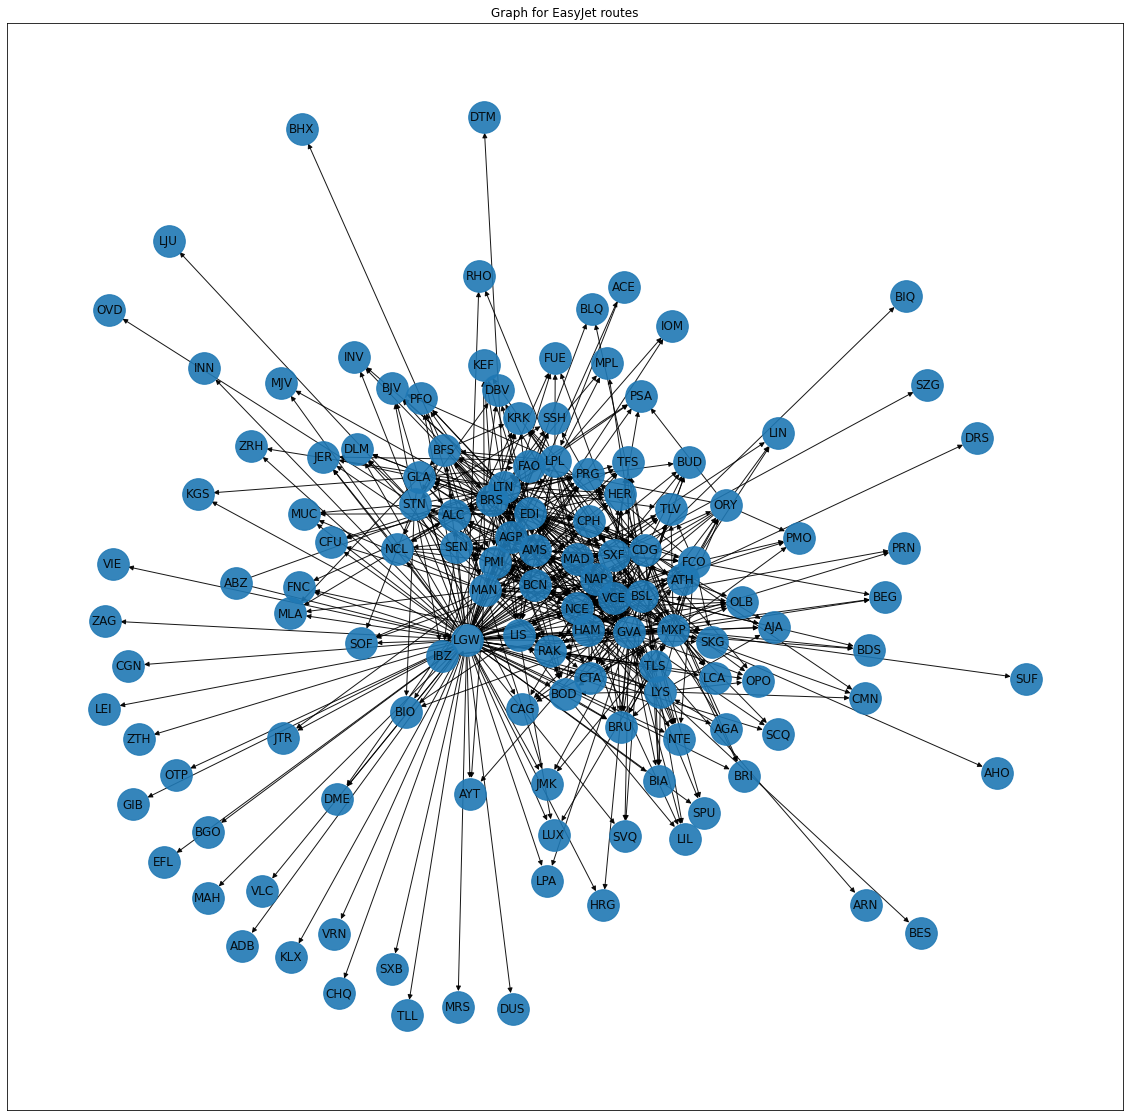

In [11]:
plt.figure(figsize=(20,20))
nx.draw_networkx(airport_graph,arrows=True,node_size = 1000,alpha = 0.9)
plt.title('Graph for EasyJet routes')
plt.show()

# Characteristics of Graph

In [12]:


def nodes_edges(graph):
    '''Takes graph as parameter 
       Returns characteristics.
    '''
    node =nx.number_of_nodes(graph)
    edge =nx.number_of_edges(graph)
    diameter =nx.diameter(graph)
    density = nx.density(graph)
    components = nx.number_connected_components(graph)
    print("Number of Nodes: ",node)
    print("Number of Edges: ", edge)
    print('Diameter of graph: ', diameter)
    print("Density of layers: ", density)
    print("Components of graph: ", components)
    

nodes_edges(airport_graph)
print("  ")
print(nodes_edges.__doc__)
    



Number of Nodes:  128
Number of Edges:  565
Diameter of graph:  4
Density of layers:  0.06951279527559055
Components of graph:  1
  
Takes graph as parameter 
       Returns characteristics.
    


In [13]:


def degree_statistics(graph):
    '''Takes graph as parameter 
       Returns characteristics.
    '''
    degrees = [v for k, v in graph.degree()]
    print("Degrees of Graph: ",degrees)
    average = sum(degrees) / len(degrees)
    minimum = min(degrees)
    maximum = max(degrees)
    print("Average Degrees: ",average)
    print("Minimum Degree: ",minimum)
    print("Maximum Degree: ",maximum)
    
degree_statistics(airport_graph)
print("    ")
print(degree_statistics.__doc__)

Degrees of Graph:  [2, 101, 34, 2, 22, 1, 4, 31, 21, 38, 15, 20, 35, 45, 14, 51, 32, 37, 12, 13, 23, 1, 5, 12, 32, 19, 13, 21, 18, 9, 1, 9, 14, 12, 3, 14, 27, 3, 3, 1, 1, 11, 8, 4, 16, 1, 5, 14, 4, 1, 5, 2, 10, 4, 13, 3, 4, 12, 5, 3, 4, 8, 3, 5, 12, 2, 5, 5, 8, 15, 6, 5, 9, 1, 4, 2, 3, 7, 6, 5, 2, 3, 5, 3, 3, 8, 13, 3, 1, 1, 4, 2, 1, 1, 4, 1, 3, 4, 1, 5, 2, 2, 6, 4, 1, 2, 2, 1, 1, 3, 1, 1, 1, 2, 4, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
Average Degrees:  8.828125
Minimum Degree:  1
Maximum Degree:  101
    
Takes graph as parameter 
       Returns characteristics.
    


In [14]:
impCons = nx.eigenvector_centrality(airport_graph)

In [15]:
# Iterating over te important aiport and ordering them in ascending order based on eigen vector
impConnections = []
for i in sorted(impCons,key=impCons.get,reverse = True):
    print(i,impCons[i]) 
    impConnections.append((i,impCons[i]))

LGW 0.3380083025043714
GVA 0.2518239258714246
SXF 0.23469535545914774
BSL 0.21817361934798932
EDI 0.20719832661863585
NCE 0.19087888972720848
BRS 0.18754634008869156
MXP 0.18685760037393132
LTN 0.18024733280673844
CDG 0.17326529169131216
AMS 0.15385000740307014
MAN 0.146411485285479
LIS 0.1457266962854153
FCO 0.13875156001148045
PMI 0.13553316011346042
BFS 0.13502219693176282
AGP 0.12809105526971581
BCN 0.12625308594836737
NAP 0.1260855171618
LYS 0.12314242059958579
LPL 0.12207742157095769
MAD 0.11908916952542942
RAK 0.11908698786667841
CPH 0.11560275410334918
HAM 0.11409330021719562
VCE 0.11340708640501387
BOD 0.11177091997782643
TLS 0.10355320967751301
ALC 0.10344582459927787
STN 0.10259068805477997
GLA 0.10158022959934203
BRU 0.09476779343780174
FAO 0.08933092149369051
TFS 0.08833897276548415
CTA 0.08722508338896767
HER 0.08711557176267362
SEN 0.08605923112649759
TLV 0.08521418955314651
ATH 0.08499952618215544
NCL 0.08345993660640434
PRG 0.08217325017587188
KRK 0.07377074832182211
O

In [16]:
impCons5 = impConnections[:5]

airport_imp = pd.DataFrame(impCons5,columns = ['Airport','ImportanceEG'],index = None)


In [17]:
# Iterating over te important aiport and ordering them in ascending order based on degree centrality
most_influ = []
most_influential =nx.degree_centrality(airport_graph)
for i in sorted(most_influential,key=most_influential.get,reverse = True):
    print(i,most_influential[i]) 
    most_influ.append((i,most_influential[i]))



LGW 0.7952755905511811
GVA 0.4015748031496063
BSL 0.3543307086614173
SXF 0.2992125984251969
MXP 0.29133858267716534
BRS 0.2755905511811024
LTN 0.26771653543307083
MAN 0.25196850393700787
EDI 0.25196850393700787
CDG 0.2440944881889764
NCE 0.2125984251968504
STN 0.18110236220472442
LPL 0.1732283464566929
LYS 0.1653543307086614
FCO 0.1653543307086614
BFS 0.15748031496062992
AMS 0.14960629921259844
LIS 0.14173228346456693
PMI 0.12598425196850394
AGP 0.11811023622047244
NAP 0.11811023622047244
GLA 0.11023622047244094
HAM 0.11023622047244094
BCN 0.11023622047244094
TLS 0.11023622047244094
SEN 0.10236220472440945
BOD 0.10236220472440945
RAK 0.10236220472440945
VCE 0.10236220472440945
NCL 0.09448818897637795
ALC 0.09448818897637795
ORY 0.09448818897637795
CPH 0.09448818897637795
MAD 0.09448818897637795
FAO 0.08661417322834646
BRU 0.07874015748031496
PRG 0.07086614173228346
ATH 0.07086614173228346
CTA 0.07086614173228346
KRK 0.06299212598425197
HER 0.06299212598425197
TFS 0.06299212598425197
TL

In [18]:
most_inf = most_influ[:5]
influ_airport = pd.DataFrame(most_inf,columns = ["Code","Influence"],index = None)
most_inf

[('LGW', 0.7952755905511811),
 ('GVA', 0.4015748031496063),
 ('BSL', 0.3543307086614173),
 ('SXF', 0.2992125984251969),
 ('MXP', 0.29133858267716534)]

In [19]:
#top 5 influential airports based on Centrality
influ_airport 

Code  Influence
0  LGW   0.795276
1  GVA   0.401575
2  BSL   0.354331
3  SXF   0.299213
4  MXP   0.291339

In [20]:
#top 5 important airport connections based on Eigen vector
airport_imp 

Airport  ImportanceEG
0     LGW      0.338008
1     GVA      0.251824
2     SXF      0.234695
3     BSL      0.218174
4     EDI      0.207198

In [21]:
df_route = pd.read_csv('AirportMapping.csv')

In [22]:
df_route

City      Country Code
0            Aalborg      Denmark  AAL
1           Aalesund       Norway  AES
2             Aarhus      Denmark  AAR
3     Abbotsford, BC       Canada  YXX
4     Abbotsford, BC       Canada  YXX
...              ...          ...  ...
1574        Zanzibar     Tanzania  ZNZ
1575        Zaragoza        Spain  ZAZ
1576       Zhengzhou        China  CGO
1577        Zhoushan        China  HSN
1578          Zurich  Switzerland  ZRH

[1579 rows x 3 columns]

In [23]:
df3 = pd.DataFrame(impConnections,columns=['Code','Importance'])

In [24]:
inf_airport =  pd.DataFrame(most_influ,columns = ['Code','Influence'])

In [25]:
cityCountry =df3.merge(df_route)
cityCountry

Code  Importance        City      Country
0    LGW    0.338008      London      England
1    GVA    0.251824      Geneva  Switzerland
2    SXF    0.234695      Berlin      Germany
3    BSL    0.218174       Basel  Switzerland
4    EDI    0.207198   Edinburgh     Scotland
..   ...         ...         ...          ...
113  DTM    0.009062    Dortmund      Germany
114  BIQ    0.008711    Biarritz       France
115  BHX    0.006788  Birmingham      England
116  BES    0.006191       Brest       France
117  LJU    0.005158   Ljubljana     Slovenia

[118 rows x 4 columns]

In [26]:
#final dataframe after merging city and country with their Code based on importance and influence
final_df = cityCountry.merge(inf_airport)
final_df.head(10)

Code  Importance       City      Country  Influence
0  LGW    0.338008     London      England   0.795276
1  GVA    0.251824     Geneva  Switzerland   0.401575
2  SXF    0.234695     Berlin      Germany   0.299213
3  BSL    0.218174      Basel  Switzerland   0.354331
4  EDI    0.207198  Edinburgh     Scotland   0.251969
5  NCE    0.190879       Nice       France   0.212598
6  BRS    0.187546    Bristol      England   0.275591
7  MXP    0.186858      Milan        Italy   0.291339
8  LTN    0.180247      Luton      England   0.267717
9  CDG    0.173265      Paris       France   0.244094


# Grouping based on Hub

In [27]:
hub1 = nx.bfs_tree(airport_graph,'GVA')

In [28]:
hub2 = nx.bfs_tree(airport_graph,'MXP')

In [29]:
hub3 = nx.bfs_tree(airport_graph,'BSL')

In [30]:
hub4 = nx.bfs_tree(airport_graph,'LTN')

In [31]:
hub5 = nx.bfs_tree(airport_graph,'NCE')

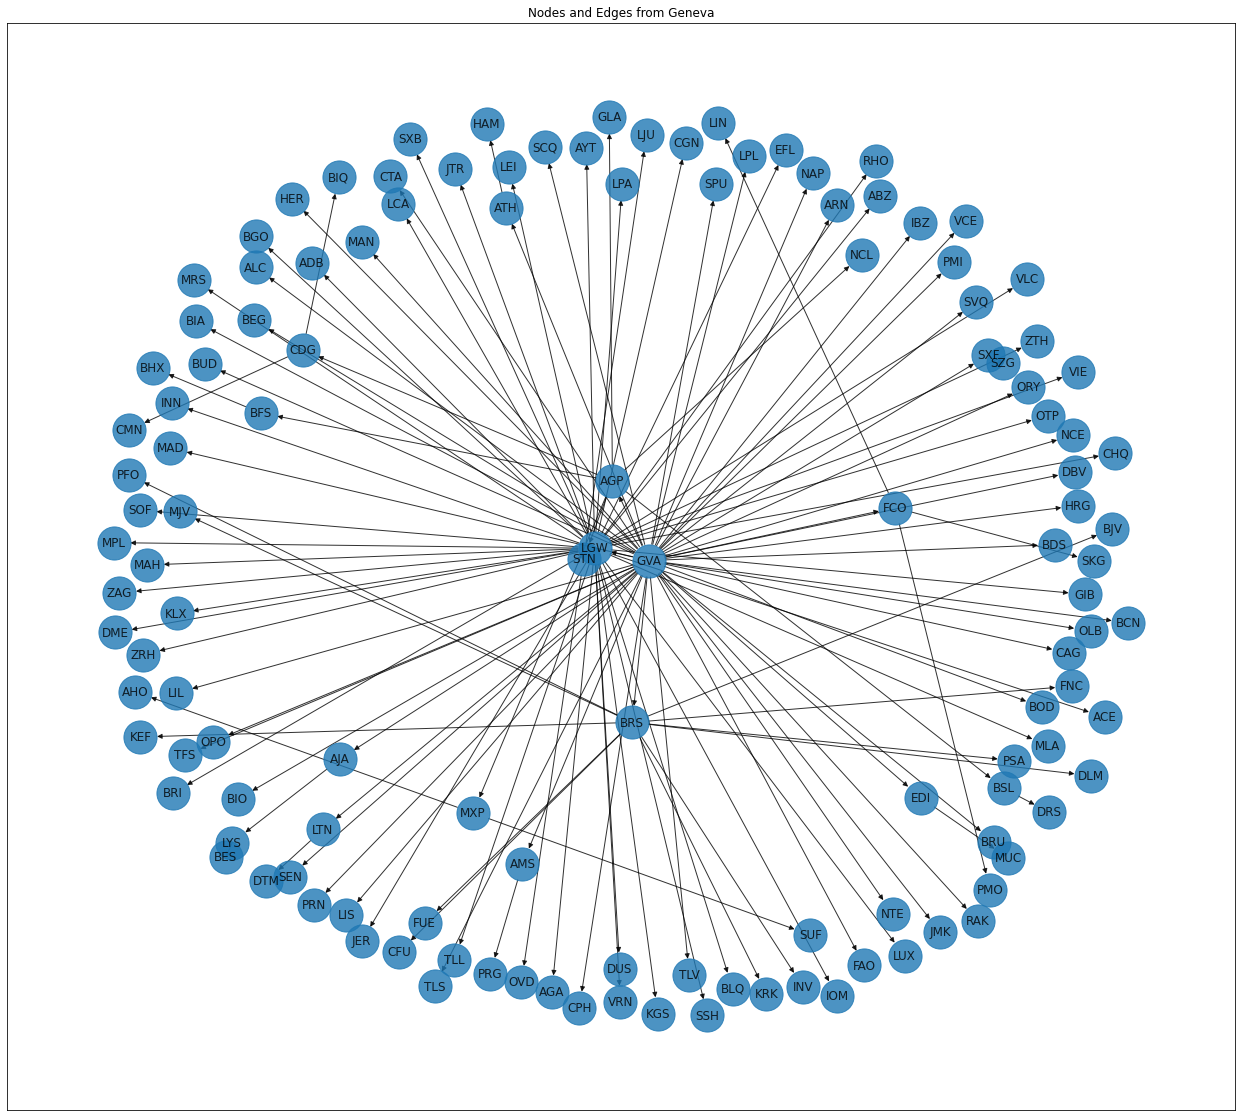

In [32]:
plt.figure(figsize=(22,20))
nx.draw_networkx(hub1,node_size = 1100,alpha = 0.8)
plt.title('Nodes and Edges from Geneva')
plt.show()


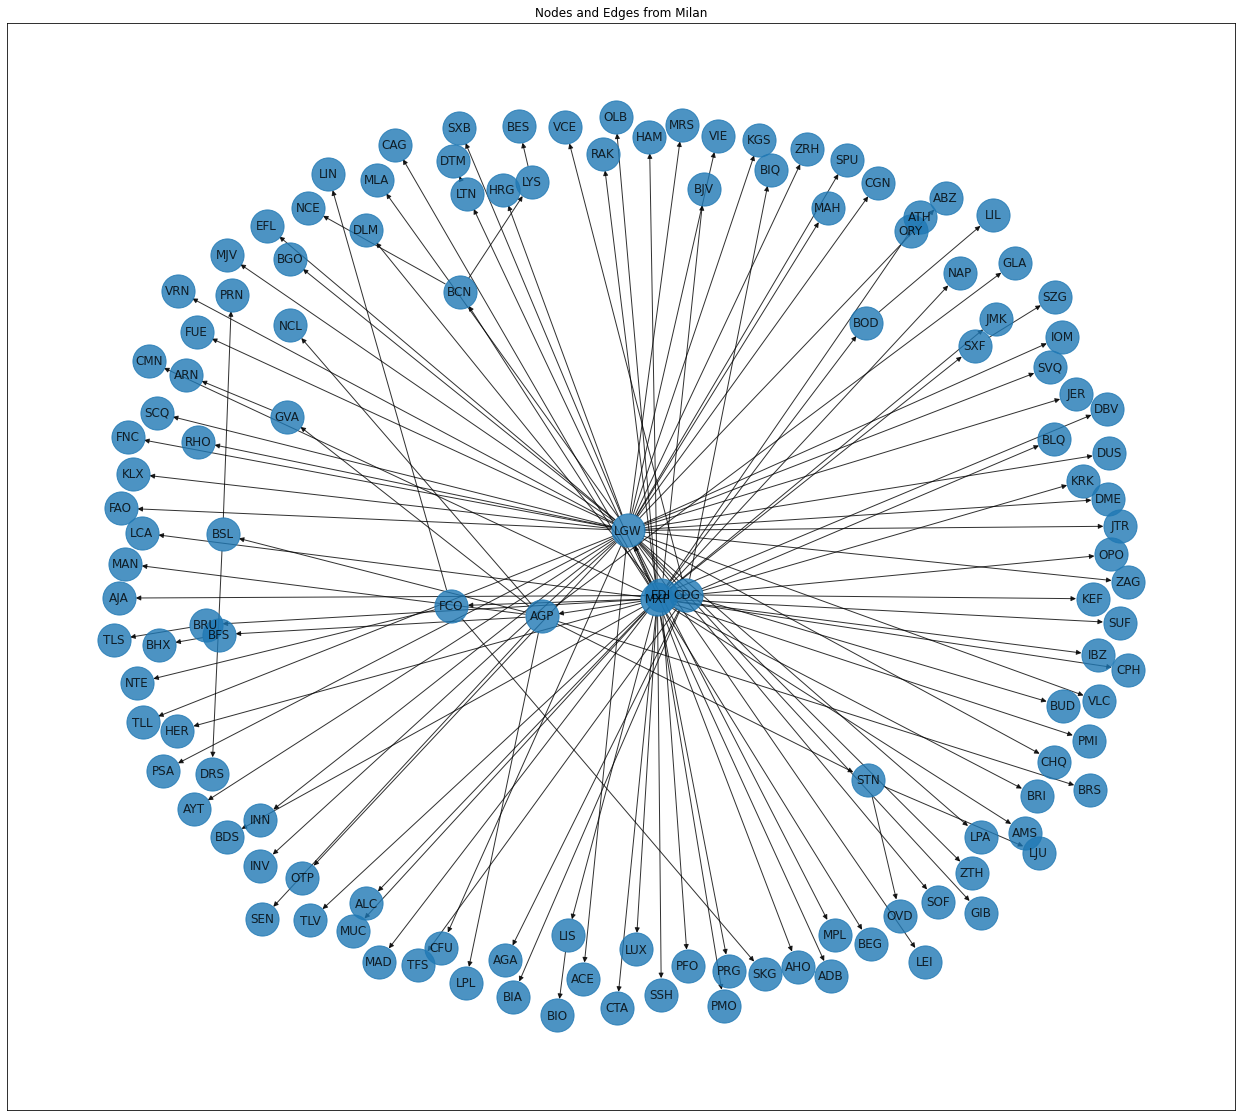

In [33]:
plt.figure(figsize=(22,20))
nx.draw_networkx(hub2,node_size = 1100,alpha = 0.8)
plt.title('Nodes and Edges from Milan')
plt.show()



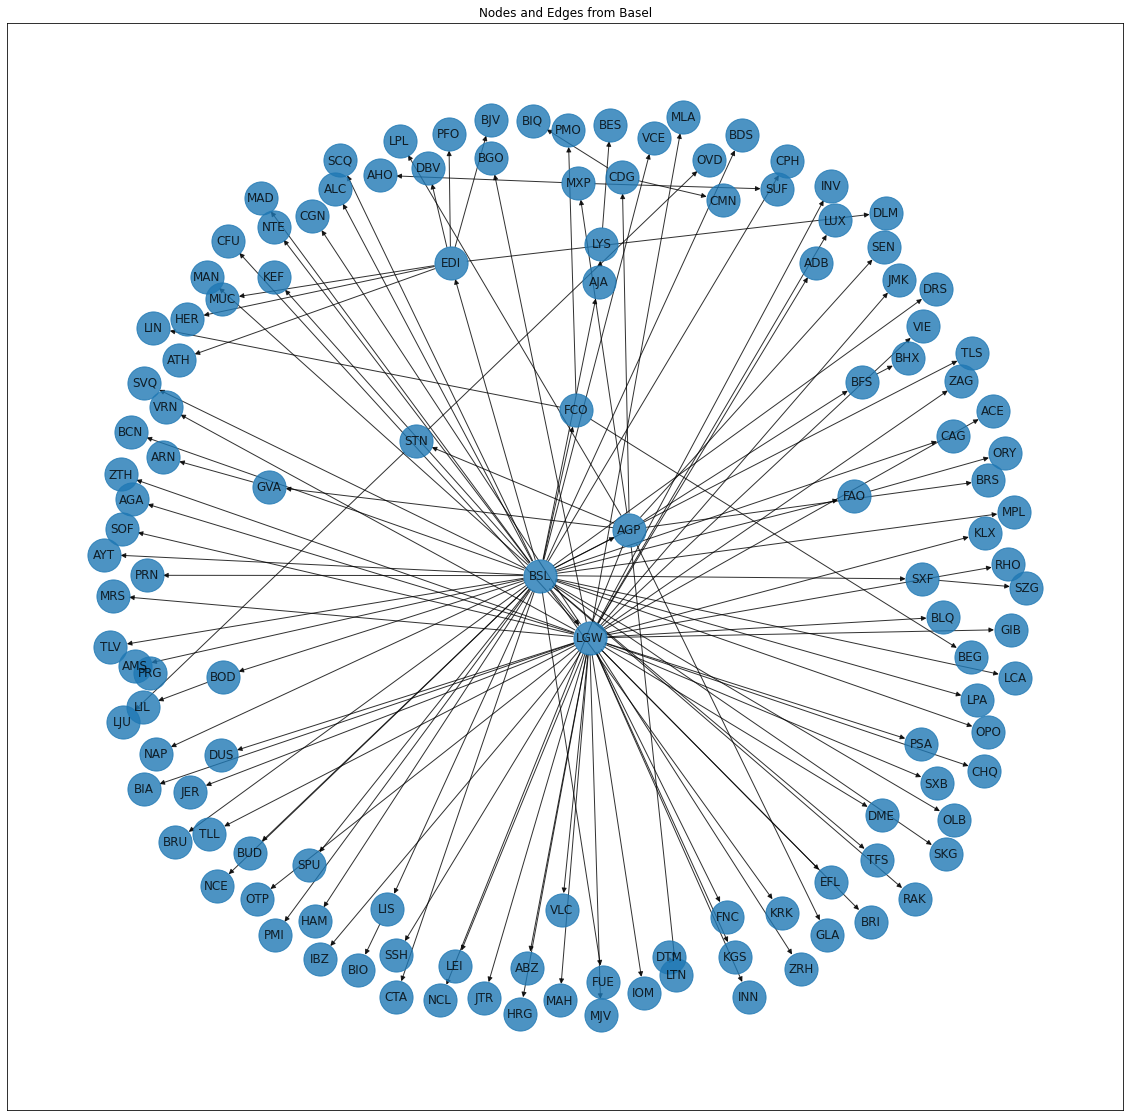

In [34]:
plt.figure(figsize=(20,20))
nx.draw_networkx(hub3,node_size = 1100,alpha = 0.8)
plt.title('Nodes and Edges from Basel')
plt.show()



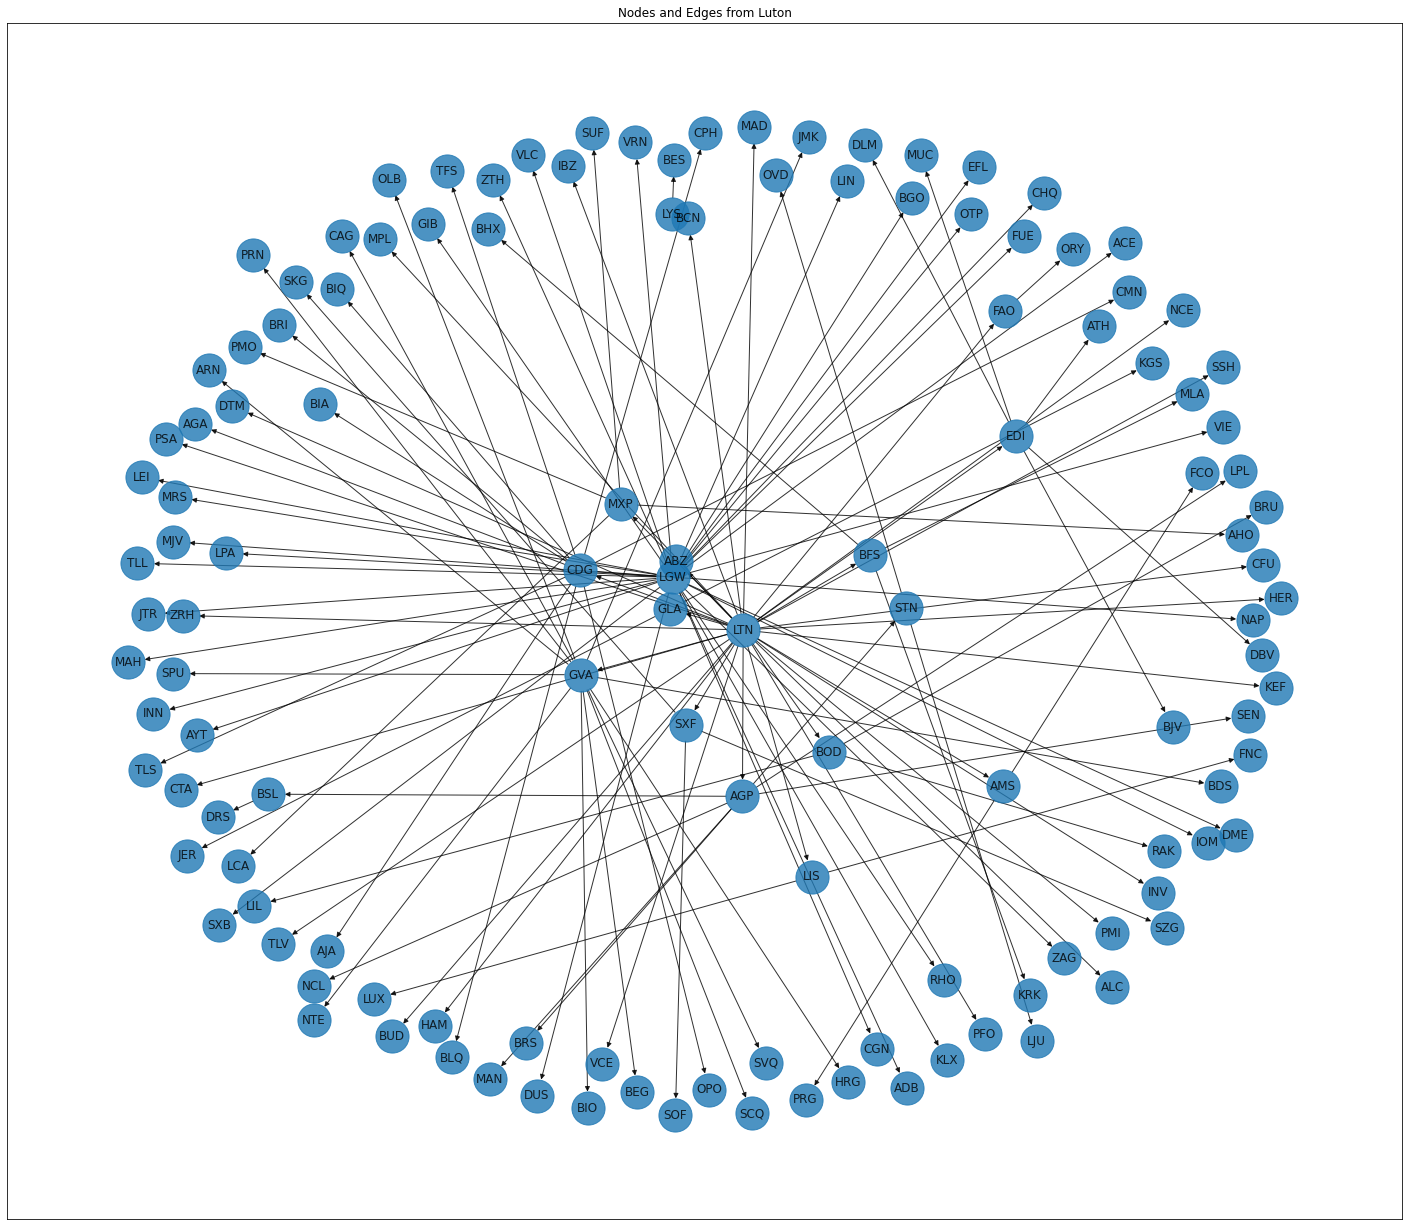

In [35]:
plt.figure(figsize=(25,22))
nx.draw_networkx(hub4,node_size = 1100,alpha = 0.8)
plt.title('Nodes and Edges from Luton')
plt.show()

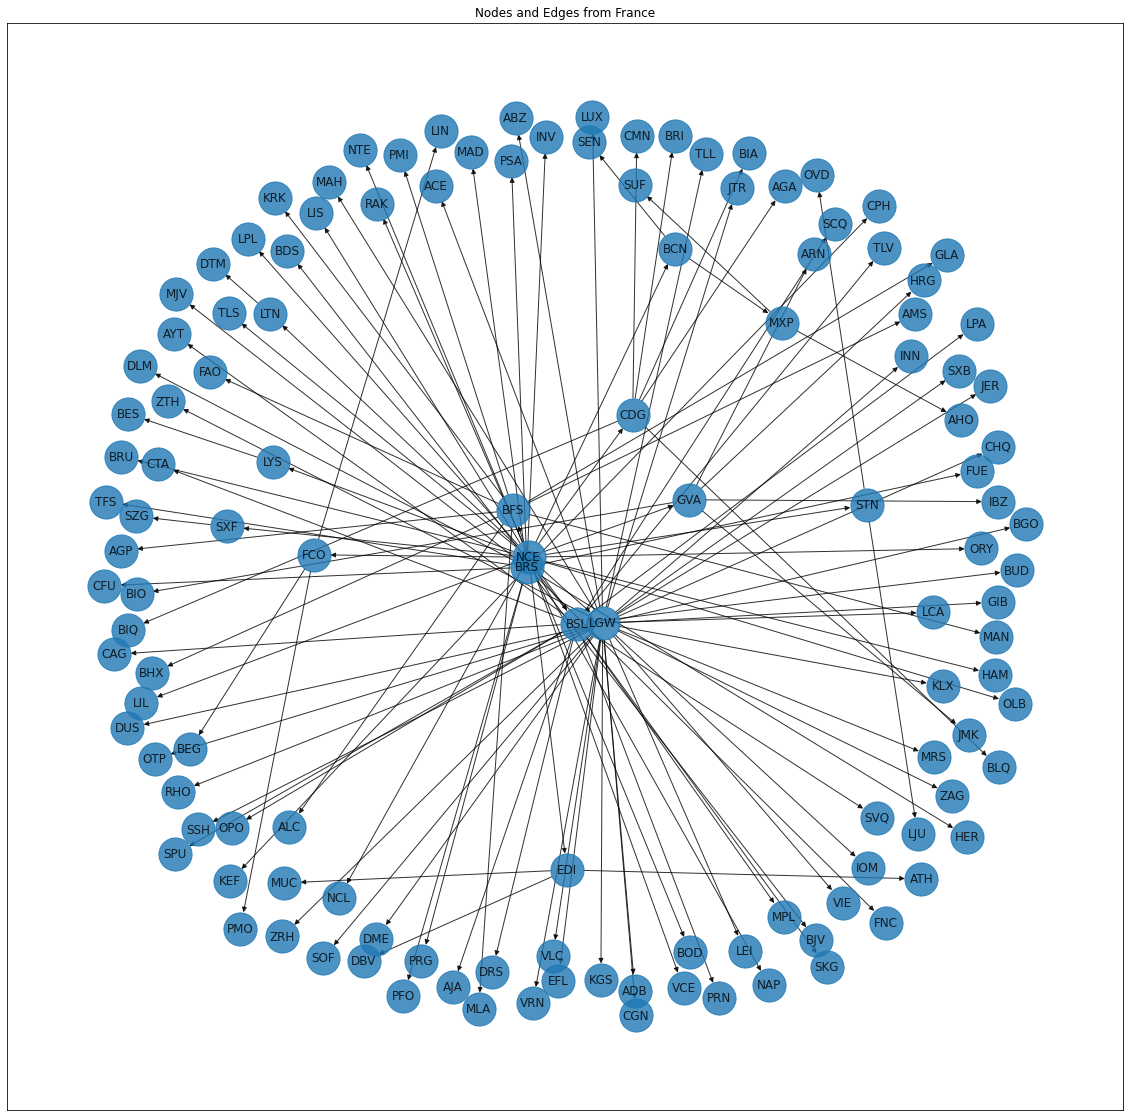

In [36]:
plt.figure(figsize=(20,20))
nx.draw_networkx(hub5,node_size = 1100,alpha = 0.8)
plt.title('Nodes and Edges from France')
plt.show()

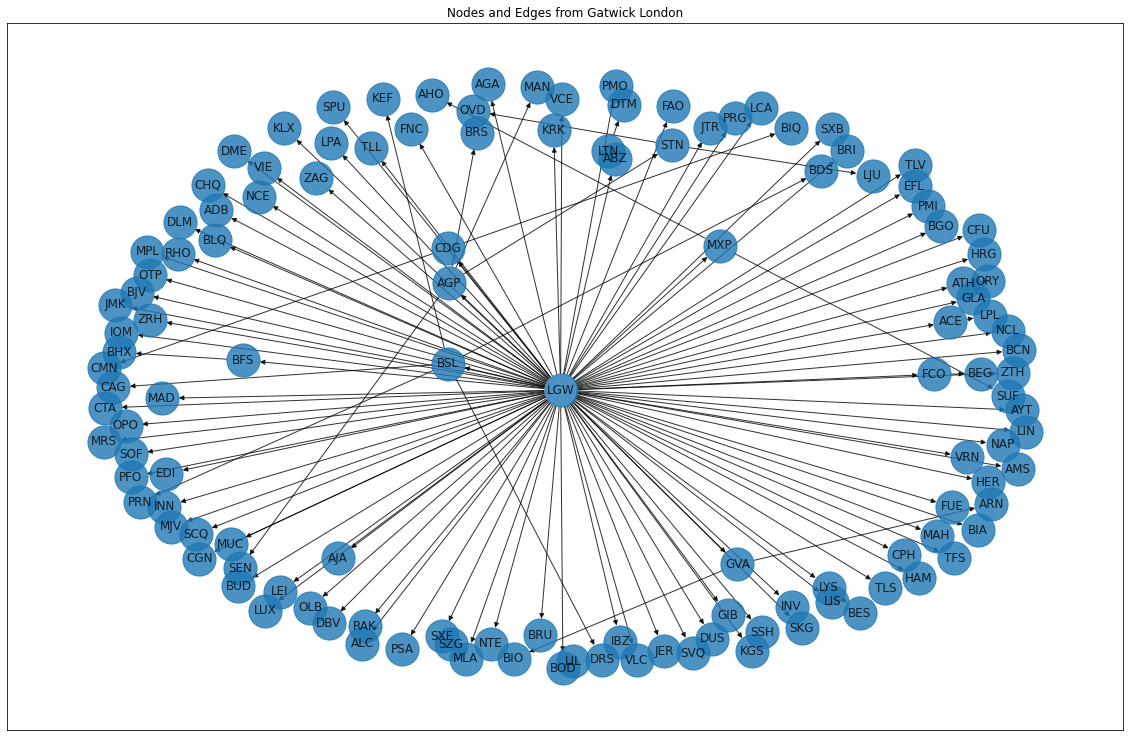

<Figure size 432x288 with 0 Axes>

In [37]:
hub1 = nx.bfs_tree(airport_graph,'LGW')
plt.figure(figsize=(20,13))
nx.draw_networkx(hub1,node_size = 1100,alpha = 0.8)
plt.title('Nodes and Edges from Gatwick London')
plt.show()
plt.savefig('london.png')